## Data Wrangling

### Load CSV and TSV file

In [1]:
import pandas as pd
import numpy as np
import requests

pd.options.display.max_rows = 4000

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
img = requests.get(url)

with open('image-predictions.tsv', 'wb') as file_img:
    file_img.write(img.content)

images_pred = pd.read_csv('image-predictions.tsv', sep = '\t')
images_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
from timeit import default_timer as timer
import json

import tweepy
from tweepy import OAuthHandler

In [5]:
# # Set up Twitter API
# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_secret = ''

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet-json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in twitter_archive['tweet_id']:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [6]:
tweets = []
for line in open('tweet-json.txt', 'r', encoding='utf8'):
    tweet = json.loads(line)
    tweets.append({'date_time': tweet['created_at'],'tweet_id': tweet['id'],'favorites': tweet['favorite_count'],'retweets': tweet['retweet_count']})
tweet_df = pd.DataFrame(tweets)
tweet_df.head()

,date_time,favorites,retweets,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,37189,7955,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,31978,5906,892177421306343426
2,Mon Jul 31 00:18:03 +0000 2017,24087,3904,891815181378084864
3,Sun Jul 30 15:58:51 +0000 2017,40499,8101,891689557279858688
4,Sat Jul 29 16:00:24 +0000 2017,38731,8790,891327558926688256


In [7]:
tweet_df.shape

(1760, 4)

<a id='assess'></a>
# Assess

### 1- Twitter Archive DataFrame

In [8]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_archive.shape

(2356, 17)

In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [13]:
twitter_archive['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
666051853826850816    1
673686845050527744    1
738891149612572673    1
685315239903100929    1
842765311967449089    1
847251039262605312    1
702321140488925184    1
756651752796094464    1
782969140009107456    1
804413760345620481    1
753026973505581056    1
7048595586914140

In [14]:
twitter_archive['name'].value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Oliver             11
Lucy               11
Lola               10
Tucker             10
Penny              10
Winston             9
Bo                  9
Sadie               8
the                 8
Daisy               7
Toby                7
Buddy               7
an                  7
Bailey              7
Jax                 6
Dave                6
Leo                 6
Stanley             6
Oscar               6
Koda                6
Jack                6
Bella               6
Milo                6
Scout               6
Rusty               6
George              5
Phil                5
Sunny               5
Gus                 5
Larry               5
Sammy               5
Louis               5
Finn                5
Bentley             5
very                5
Oakley              5
Alfie               5
Chester             5
Riley               4
Archie              4
just                4
Dexter    

In [15]:
twitter_archive['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
7.599238e+17    1
7.776842e+17    1
7.410673e+17    1
8.316501e+17    1
7.012147e+17    1
7.950767e+17    1
8.178278e+17    1
7.363926e+17    1
6.733201e+17    1
8.768508e+17    1
8.011679e+17    1
7.823059e+17    1
6.914169e+17    1
8.630625e+17    1
8.224891e+17    1
7.827226e+17    1
8.860537e+17    1
6.798284e+17    1
8.008540e+17    1
8.370113e+17    1
6.791584e+17    1
6.753544e+17    1
7.467577e+17    1
6.790626e+17    1
8.591970e+17    1
7.790561e+

In [16]:
# Check the non-NA retweeted_status_id, the same as the cell above
len(twitter_archive['retweeted_status_id'].dropna())

181

In [17]:
# check min and max values in rating_numerator column
print('rating numerator min = {}\nrating numerator max = {}'.format(twitter_archive.rating_numerator.min(),twitter_archive.rating_numerator.max()))

rating numerator min = 0
rating numerator max = 1776


In [18]:
# Check all rating numerator value
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
# Count how many records with rating numerator > 20, seems it is somewhat unreasonable since most values concentrate at 0~20
twitter_archive[twitter_archive['rating_numerator'] > 20].shape[0]

24

In [20]:
# check min and max values and mean for all values in rating_denominator column
print('rating denominator min = {}\nrating denominator max = {}\nrating denominator mean = {}'.format(twitter_archive.rating_denominator.min(), twitter_archive.rating_denominator.max(), twitter_archive.rating_denominator.mean()))

rating denominator min = 0
rating denominator max = 170
rating denominator mean = 10.455432937181664


In [21]:
# Check all rating denominator value
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
# Count how many values in rating_denominator column are not 10
twitter_archive.loc[twitter_archive['rating_denominator'] != 10].shape[0]

23

In [23]:
# View the all rating denominator not equal to 10 records
twitter_archive.loc[twitter_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


### 2- Tweet Images Prediction DataFrame

In [24]:
images_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
images_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
images_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
images_pred.shape

(2075, 12)

In [28]:
images_pred['p1'].value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
malamute                           30
cocker_spaniel                     30
French_bulldog                     26
Chesapeake_Bay_retriever           23
miniature_pinscher                 23
seat_belt                          22
German_shepherd                    20
Siberian_husky                     20
Staffordshire_bullterrier          20
Cardigan                           19
web_site                           19
teddy                              18
Shetland_sheepdog                  18
beagle                             18
Maltese_dog                        18
Eskimo_dog                         18
Shih-Tzu                           17
Lakeland_ter

In [29]:
images_pred['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [30]:
images_pred['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
malinois                           20
chow                               20
toy_terrier                        20
miniature_pinscher                 20
Samoyed                            20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [31]:
images_pred['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [32]:
images_pred['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [33]:
images_pred[images_pred["jpg_url"].duplicated() == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [34]:
images_pred['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### 3- JSON tweets DataFrame

In [35]:
tweet_df.head()

,date_time,favorites,retweets,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,37189,7955,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,31978,5906,892177421306343426
2,Mon Jul 31 00:18:03 +0000 2017,24087,3904,891815181378084864
3,Sun Jul 30 15:58:51 +0000 2017,40499,8101,891689557279858688
4,Sat Jul 29 16:00:24 +0000 2017,38731,8790,891327558926688256


In [36]:
tweet_df['date_time'].value_counts()

Fri Feb 24 01:03:08 +0000 2017    1
Fri May 12 17:12:53 +0000 2017    1
Fri Jan 29 16:30:45 +0000 2016    1
Tue Mar 15 01:48:55 +0000 2016    1
Tue Dec 08 02:23:09 +0000 2015    1
Fri Dec 18 05:06:23 +0000 2015    1
Sun Dec 06 19:21:47 +0000 2015    1
Wed Feb 15 18:54:34 +0000 2017    1
Wed Dec 28 00:52:25 +0000 2016    1
Wed Feb 01 01:09:42 +0000 2017    1
Sat Dec 12 18:13:51 +0000 2015    1
Thu Dec 22 17:23:53 +0000 2016    1
Wed Jan 04 17:27:59 +0000 2017    1
Thu Dec 31 02:52:40 +0000 2015    1
Tue Dec 15 17:42:34 +0000 2015    1
Sat Jan 02 01:33:43 +0000 2016    1
Wed May 03 03:17:27 +0000 2017    1
Tue Feb 09 02:40:05 +0000 2016    1
Wed Feb 17 02:02:25 +0000 2016    1
Fri Dec 02 17:27:25 +0000 2016    1
Thu Sep 22 00:13:04 +0000 2016    1
Tue Oct 11 19:39:28 +0000 2016    1
Fri Feb 05 03:18:42 +0000 2016    1
Tue Jan 24 01:08:40 +0000 2017    1
Wed Sep 28 21:56:36 +0000 2016    1
Wed Sep 21 00:53:04 +0000 2016    1
Fri Dec 25 19:39:43 +0000 2015    1
Mon Aug 15 16:22:20 +0000 20

In [37]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 4 columns):
date_time    1760 non-null object
favorites    1760 non-null int64
retweets     1760 non-null int64
tweet_id     1760 non-null int64
dtypes: int64(3), object(1)
memory usage: 55.1+ KB


In [38]:
tweet_df.describe()

,favorites,retweets,tweet_id
count,1760.000000,1760.000000,1.760000e+03
mean,8922.603977,3146.289773,7.539516e+17
std,12430.098775,4637.210603,7.135442e+16
min,0.000000,1.000000,6.713626e+17
25%,1907.000000,707.500000,6.852978e+17
50%,3739.000000,1612.500000,7.200513e+17
75%,11737.500000,3710.000000,8.182715e+17
max,136938.000000,58604.000000,8.924206e+17


In [39]:
tweet_df.shape

(1760, 4)

### Quality
- Several columns have (almost) empty values:

    - *in_reply_to_status_id*
    
    - *in_reply_to_user_id*
    
    - *retweeted_status_id*
    
    - *retweeted_status_user_id*
    
    - *retweeted_status_timestamp*.
    
    - *date_time*
    
    
    
- There is some rows contains more than one dog.
- The numerator and denominator columns have unusual values, for example, the max for *rating_numerator* exceed 1000.
- The timestamp column is an object. It has to be a datetime object.
- There's some of url images are duplicated in *images_pred*
- tweet_id convert to string
- unequal rows between images datafram and archive dataframe (2075 and 2356), whitch means that row doesn't include imeges. 
- In several columns, null values are not treated as null values.


### Tidiness

- Dog types column is seperated in three columns.
- we need to join and combined all datasets in one dataset

<a id='clean'></a>
# Clean


### First we're going make copies of the DF's

In [40]:
twitter_archive_clean = twitter_archive.copy()
images_pred_clean = images_pred.copy()
tweet_df_clean = tweet_df.copy()

In [41]:
twitter_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [42]:
images_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [43]:
tweet_df_clean.head()

,date_time,favorites,retweets,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,37189,7955,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,31978,5906,892177421306343426
2,Mon Jul 31 00:18:03 +0000 2017,24087,3904,891815181378084864
3,Sun Jul 30 15:58:51 +0000 2017,40499,8101,891689557279858688
4,Sat Jul 29 16:00:24 +0000 2017,38731,8790,891327558926688256


# Quality

## Quality - 1
### Define:
**Several columns have empty values**

Keep the values that are present though few as they might be important to another data scientist.

### Code:

In [44]:
# Create an array of indexes to drop where retweeted_status_id column have values.
idx_to_drop = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull() == False].index

# Drop the rows corresponding to those indexes.
twitter_archive_clean.drop(idx_to_drop, axis=0, inplace = True)

# Reset the indexes
twitter_archive_clean.reset_index(drop=True, inplace=True)

### Test:

In [45]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

## Quality - 2
### Define:
**The name column has many entries which do not look like names**

This function resposable extract the names for spilt text inside df column and matched usining re function 
we will be pass the dataset and test the text column and matched using re tool
finally this function return extracted names from text coumn

### Code:

In [46]:
import re
twitter_archive_clean['txt_splt'] = twitter_archive_clean['text'].str.split()
all = []

def check_relly_name(df):  

    if 'named' in df['text'] and re.match(r'[A-Z].*', df['txt_splt'][(df['txt_splt'].index('named') + 1)]): 
            all.append(df['txt_splt'][(df['txt_splt'].index('named') + 1)])  
    elif df['text'].startswith('Here is a ') and re.match(r'[A-Z].*', df['txt_splt'][3]):
            all.append(df['txt_splt'][3].strip('.').strip(','))         
    elif df['text'].startswith('Here we have ') and re.match(r'[A-Z].*', df['txt_splt'][3]):
            all.append(df['txt_splt'][3].strip('.').strip(',')) 
    elif df['text'].startswith('This is ') and re.match(r'[A-Z].*', df['txt_splt'][2]):
            all.append(df['txt_splt'][2].strip('.').strip(',')) 
    elif df['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', df['txt_splt'][3]):
            all.append(df['txt_splt'][3].strip('.').strip(',')) 
    elif df['text'].startswith('Meet ') and re.match(r'[A-Z].*', df['txt_splt'][1]):
            all.append(df['txt_splt'][1].strip('.').strip(',')) 
    else:
        all.append('Not_Provide') 
        
twitter_archive_clean.apply(check_relly_name, axis=1)

twitter_archive_clean['Extracted_name'] = all

In [47]:
twitter_archive_clean['name'].replace('O', "O'Malley", inplace = True)

In [48]:
twitter_archive_clean.loc[twitter_archive_clean.name.str.islower(),'name']= np.nan

In [49]:
twitter_archive_clean['name'].replace('None', np.nan, inplace = True)

In [50]:
twitter_archive_clean.loc[twitter_archive_clean['Extracted_name'] == 'Not_Provide', 'Extracted_name'] = None

### Test:

In [51]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 19 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1391 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
txt_splt                      2175 non

In [52]:
twitter_archive_clean.name.value_counts()

Lucy              11
Charlie           11
Cooper            10
Oliver            10
Tucker             9
Penny              9
Lola               8
Sadie              8
Winston            8
Daisy              7
Toby               7
Jax                6
Oscar              6
Koda               6
Bella              6
Bailey             6
Bo                 6
Stanley            6
Buddy              5
Bentley            5
Scout              5
Dave               5
Rusty              5
Chester            5
Leo                5
Louis              5
Milo               5
Oakley             4
Derek              4
Clarence           4
Scooter            4
Duke               4
Jerry              4
Alfie              4
Sophie             4
Archie             4
Larry              4
Dexter             4
Boomer             4
Sammy              4
Jack               4
Gus                4
Bear               4
Clark              4
Winnie             4
Phil               4
Chip               4
Finn         

In [53]:
twitter_archive_clean.Extracted_name.value_counts()

Charlie           11
Lucy              11
Cooper            10
Oliver            10
Tucker             9
Penny              9
Sadie              8
Winston            8
Lola               8
Daisy              7
Bailey             6
Koda               6
Oscar              6
Jax                6
Bo                 6
Stanley            6
Bella              6
Toby               6
Scout              5
Chester            5
Louis              5
Bentley            5
Rusty              5
Buddy              5
Leo                5
Milo               5
Boomer             4
Sammy              4
Derek              4
Sophie             4
Finn               4
Winnie             4
Jerry              4
Dexter             4
Larry              4
Duke               4
Scooter            4
Clark              4
Alfie              4
Jack               4
Chip               4
Gus                4
Maggie             4
Clarence           4
Bear               4
Oakley             4
Gary               4
Jeffrey      

## Quality - 3
### Define: 
**The numerator and denominator columns have unusual values, for example, the max for *rating_numerator* exceed 1000**

### Code:

From the Access section, we check the value distribution of rating numerator and denomiator. Seems most of denominator should be 10 but still need to check the original text.

In [54]:
twitter_archive_clean.loc[twitter_archive_clean.rating_numerator>20][['text', 'rating_numerator']]

,text,rating_numerator
162,@dhmontgomery We also gave snoop dogg a 420/10...,420
163,@s8n You tried very hard to portray this good ...,666
246,@markhoppus 182/10,182
263,@jonnysun @Lin_Manuel ok jomny I know you're e...,960
363,The floofs have been released I repeat the flo...,84
429,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24
558,"This is Logan, the Chow who lived. He solemnly...",75
617,This is Sophie. She's a Jubilant Bush Pupper. ...,27
733,Why does this never happen at my front door......,165
804,This is Atticus. He's quite simply America af....,1776


In [55]:
twitter_archive_clean.loc[twitter_archive_clean.rating_numerator<=0][['text', 'rating_numerator']]

,text,rating_numerator
265,When you're so blinded by your systematic plag...,0
840,"PUPDATE: can't see any. Even if I could, I cou...",0


From the text, seems the numerators are extracted correctly. Although unusual.

Another similar issue is that rating_numerator was not extracted correctly.

In [56]:
pd.set_option('display.max_colwidth', -1)
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\cs_ch\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
42,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
558,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
617,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1510,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1533,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [57]:
twitter_archive_clean.loc[twitter_archive_clean.index==42,'rating_numerator'] = 13.5
twitter_archive_clean.loc[twitter_archive_clean.index==558,'rating_numerator'] = 9.75
twitter_archive_clean.loc[twitter_archive_clean.index==617,'rating_numerator'] = 11.27
twitter_archive_clean.loc[twitter_archive_clean.index==1510,'rating_numerator'] = 9.5
twitter_archive_clean.loc[twitter_archive_clean.index==1533,'rating_numerator'] = 11.26

### Test:

In [58]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\cs_ch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
42,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
558,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
617,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1510,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50
1533,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


## Quality - 4
## Define:
**The timestamp column is an object. It has to be a datetime object.**

### Code:

In [59]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
tweet_df_clean['date_time'] = pd.to_datetime(tweet_df_clean['date_time'])

### Test:

In [60]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 19 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          1391 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
txt_splt               

In [61]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 4 columns):
date_time    1760 non-null datetime64[ns, UTC]
favorites    1760 non-null int64
retweets     1760 non-null int64
tweet_id     1760 non-null int64
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 55.1 KB


## Quality - 5
### Define: 
**There's some of url images are duplicated in *images_pred***

### Code:

In [62]:
images_pred_clean.drop_duplicates(subset ="jpg_url",   keep = 'first', inplace = True)

### Test: 

In [63]:
images_pred_clean[images_pred_clean['jpg_url'].duplicated() == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Quality - 6
### Define: 
**convert tweet_id of *images_pred_clean*, *images_pred_clean* and *tweet_df_clean* to String**

### Code:

In [64]:
images_pred_clean['tweet_id'] = images_pred_clean['tweet_id'].astype(str)

In [65]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

In [66]:
tweet_df_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

### Test:

In [67]:
images_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


In [68]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 19 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          1391 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
txt_splt              

## Quality - 7
### Define: 
**join the dataframe twitter_archive_clean to images_pred_clean some tweets without images**

### Code:

In [69]:
twitter_archive_clean = twitter_archive_clean.merge(images_pred_clean, on='tweet_id', how='inner')

### Test: 

In [70]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 30 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns, UTC]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null float64
rating_denominator            1994 non-null int64
name                          1350 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
txt_splt              

## Quality - 8
### Define: 
**In several columns, null values are not treated as null values**

### Code:

In [71]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace('None', np.NaN)
twitter_archive_clean['Extracted_name'] = twitter_archive_clean['name'].replace('None', np.NaN)

### Test:

In [72]:
twitter_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


# Tideness

## Tideness - 1
### Define:
**Dog types column is seperated in three columns**

### Code:

In [73]:
# Make column values to 1 if the stage is correct otherwise 0 in all for stages columns
twitter_archive_clean['doggo'] = [0 if x == 'None' else 1 for x in twitter_archive_clean['doggo']]
twitter_archive_clean['floofer'] = [0 if x == 'None' else 1 for x in twitter_archive_clean['floofer']]
twitter_archive_clean['pupper'] = [0 if x == 'None' else 1 for x in twitter_archive_clean['pupper']]
twitter_archive_clean['puppo'] = [0 if x == 'None' else 1 for x in twitter_archive_clean['puppo']]

# Create a column for no stage named 'none' and set value equal to 1 if there is no stage and otherwise 0.
twitter_archive_clean['none'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']
twitter_archive_clean['none'] = [1 if x == 0 else 0 for x in twitter_archive_clean['none']]

# Create a column for multi stages named 'multiple' and set value equal to 1 if there are more than one stage and otherwise 0.
twitter_archive_clean['multiple'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo'] + twitter_archive_clean['none']
twitter_archive_clean['multiple'] = [1 if x > 1 else 0 for x in twitter_archive_clean['multiple']]

# Replace values (1's with 0's) in dog stage columns (doggo, floofer, pupper and puppo) if multiple stage is 1
twitter_archive_clean.loc[twitter_archive_clean.multiple == 1, ['doggo', 'floofer', 'pupper', 'puppo']] = 0, 0, 0, 0

In [74]:
# Create the stage column using melt()
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'timestamp','source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'img_num'],
                           var_name='dog_stage', value_name = 'stage_name')

In [75]:
# Keep the records with only stage_name == 1.
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['stage_name'] == 1]

# Drop the stage_name column
twitter_archive_clean.drop(['stage_name'], axis = 1, inplace = True)
twitter_archive_clean.reset_index(drop=True, inplace=True)

### Test:

In [76]:
twitter_archive_clean['dog_stage'].value_counts()

none        1688
pupper      203 
doggo       63  
puppo       22  
multiple    11  
floofer     7   
Name: dog_stage, dtype: int64

## Tideness - 2
### Define:
**join and combined all datasets in one dataset**

### Code:

In [77]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=tweet_df_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [78]:
#drop non needed colums
twitter_archive_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)

### Test:

twitter_archive_clean.head(1)

In [79]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1585 entries, 0 to 1584
Data columns (total 13 columns):
tweet_id              1585 non-null object
timestamp             1585 non-null datetime64[ns, UTC]
source                1585 non-null object
text                  1585 non-null object
expanded_urls         1585 non-null object
rating_numerator      1585 non-null float64
rating_denominator    1585 non-null int64
name                  1114 non-null object
img_num               1585 non-null int64
dog_stage             1585 non-null object
date_time             1585 non-null datetime64[ns, UTC]
favorites             1585 non-null int64
retweets              1585 non-null int64
dtypes: datetime64[ns, UTC](2), float64(1), int64(4), object(6)
memory usage: 173.4+ KB


## Save the DataSet to CSV File Named: *twitter_archive_master*

In [80]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

## Data Analysis

### The relationship between Retweets and Favorites

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

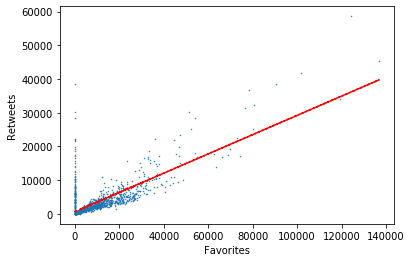

In [82]:
plt.plot(twitter_archive_clean.favorites, twitter_archive_clean.retweets,linestyle='',marker='o', markersize=0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')

x = twitter_archive_clean.favorites
y = twitter_archive_clean.retweets

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

### The relationship between Retweets and Favorites with Rating

Text(0.5, 0, 'Rating')

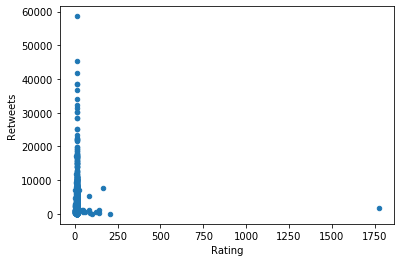

In [83]:
twitter_archive_clean.plot(x='rating_numerator', y='retweets', kind='scatter')
plt.ylabel('Retweets')
plt.xlabel('Rating')

In [84]:
twitter_archive_clean[['favorites', 'rating_numerator', 'retweets']].corr(method='pearson')

,favorites,rating_numerator,retweets
favorites,1.000000,0.002479,0.751522
rating_numerator,0.002479,1.000000,-0.003912
retweets,0.751522,-0.003912,1.000000


### Rating increase over the time

Text(0, 0.5, 'Rating')

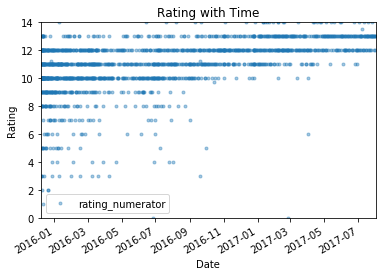

In [85]:
twitter_archive_clean.set_index('timestamp', inplace=True)
twitter_archive_clean.plot(y='rating_numerator', ylim=[0,14], style = '.', alpha = 0.4)
plt.title('Rating with Time')
plt.xlabel('Date')
plt.ylabel('Rating')

In [86]:
twitter_archive_clean['rating_numerator'].describe()

count    1585.000000
mean     12.804278  
std      45.327359  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

### Dog Stages Stats

In [87]:
twitter_archive_clean.groupby('dog_stage')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,63.0,11.888889,1.471351,8.0,11.00,12.0,13.0,14.0
floofer,7.0,12.000000,1.154701,10.0,11.50,12.0,13.0,13.0
multiple,11.0,11.181818,2.227922,5.0,11.00,12.0,12.0,13.0
none,1298.0,13.168344,50.078320,0.0,10.00,11.0,12.0,1776.0
pupper,184.0,10.773207,1.673661,3.0,10.00,11.0,12.0,14.0
puppo,22.0,12.000000,1.309307,9.0,11.25,12.0,13.0,14.0


Text(0.5, 1.0, '')

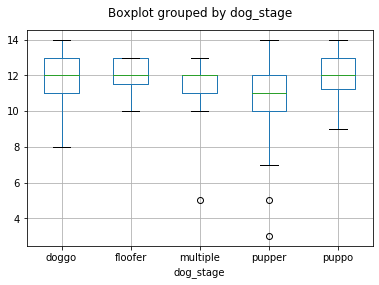

In [88]:
twitter_archive_clean.loc[twitter_archive_clean.dog_stage!="none"].boxplot(column='rating_numerator', by='dog_stage')
plt.title('')